In [ ]:
import numpy as np
import matplotlib.pyplot as plt
##############################exercise 1#######################################
#Load data
X_train = np.loadtxt('X_train.csv', delimiter=",")
y_train = np.loadtxt('y_train.csv', delimiter=",").astype(int)
X_test = np.loadtxt('X_test.csv', delimiter=",")
y_test = np.loadtxt('y_test.csv', delimiter=",").astype(int)
data_train = np.c_[X_train,y_train]
data_test = np.c_[X_test,y_test]

In [ ]:
def same_label_counts(data):
  results = {}
  for row in data:
    key = row[len(row)-1]
    if key not in results : results[key] = 0
    results[key] += 1
  return results
def cal_misserr(data):
  results = same_label_counts(data)
  err = 0
  if 1.0 in results.keys():
    p = float(results[1.0])/len(data)
    if p != 0 and p != 1:
      if p <= 1-p:
        err = p
      else : err = 1-p
  elif 0.0 in results.keys():
    p = float(results[0.0])/len(data)
    if p != 0 and p != 1:
      if p <= 1-p:
        err = p
      else : err = 1-p
  return err
def cal_gini(data):
  results = same_label_counts(data)
  gini = 0.0
  if 1.0 in results.keys():
    p = float(results[1.0])/len(data)
    if p != 0 and p != 1:
      gini = p*(1-p)
  elif 0.0 in results.keys():
    p = float(results[0.0])/len(data)
    if p != 0 and p != 1:
      gini = p*(1-p)
  return gini
def cal_entropy(data):
  from math import log
  log2 = lambda x:log(x)/log(2)
  results = same_label_counts(data)
  ent = 0.0
  if 1.0 in results.keys():
    p = float(results[1.0])/len(data)
    if p != 0 and p != 1:
      ent = -p*log2(p)-(1-p)*log2(1-p)
  elif 0.0 in results.keys():
    p = float(results[0.0])/len(data)
    if p != 0 and p != 1:
      ent = -p*log2(p)-(1-p)*log2(1-p)
  return ent
def dividedata(data,col,val):
  split_function = lambda row : row[col] >= val
  set1 = [row for row in data if split_function(row)]
  set2 = [row for row in data if not split_function(row)]
  return(set1,set2)
#save nodes info
class decisionnode:
  def __init__(self,col = -1,value = None,results = None,tb = None,fb = None):
    self.col = col   #feature been choose
    self.value = value #threshold for spliting
    self.results = results #a dictionary,key = label, value = number of row with same label
    self.tb = tb ## desision node with true split
    self.fb = fb ## desision node with false split


In [ ]:
class DecisionTree:
  def __init__(self,max_depth):
    self.max_depth = max_depth
    self.counts_generation = 1
  def build(self, data, scoref):
    if len(data) == 0 : return decisionnode()
    score = scoref(data)
    best_loss = float('inf')
    best_criteria = None
    best_sets = None
    column_count = len(data[0]) - 1
    for col in range(column_count):
      column_values = {}
      for row in data:
        column_values[row[col]] = 1
      for value in column_values.keys():
        (set1,set2) = dividedata(data,col,value)
        prob = float(len(set1))/len(data)
        loss = prob*scoref(set1) + (1-prob)*scoref(set2)
        if loss < best_loss and len(set1) > 0 and len(set2) > 0:
          best_loss = loss
          best_criteria = (col,value)
          best_sets = (set1,set2)
    if best_loss < score and self.counts_generation < 2**(self.max_depth):
      self.counts_generation += 1
      truebranch = self.build(best_sets[0],scoref)
      falsebranch = self.build(best_sets[1],scoref)
      return decisionnode(col = best_criteria[0],value = best_criteria[1],tb = truebranch,fb = falsebranch)
    else: 
      return decisionnode(results = same_label_counts(data))
  def predict(self, data, tree):
    if tree.results!= None:
      return max(tree.results,key=lambda x : tree.results[x])
    else:
      v = data[tree.col]
      branch = None
      if v >= tree.value : branch = tree.tb
      else : branch = tree.fb
      return self.predict(data,branch)

Text(0.5, 1.0, 'Missclassification error')

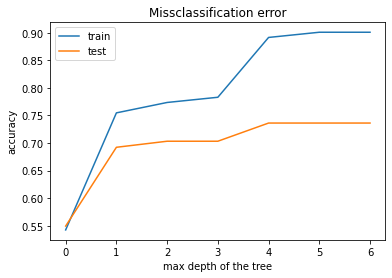

In [ ]:
#for misserror method
train_acc = []
test_acc = []
for depth in range(7):
  d = DecisionTree(depth)
  tree = d.build(data_train,cal_misserr)
  count = 0
  for i in range(len(data_train)):
    if d.predict(data_train[i],tree) == data_train[i][-1]:
      count += 1
  train_acc.append(count/len(data_train))
  count = 0
  for i in range(len(data_test)):
    if d.predict(data_test[i],tree) == data_test[i][-1]:
      count += 1
  test_acc.append(count/len(data_test))
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train','test'])
plt.xlabel('max depth of the tree')
plt.ylabel('accuracy')
plt.title('Missclassification error')

Text(0.5, 1.0, 'Gini coefficient')

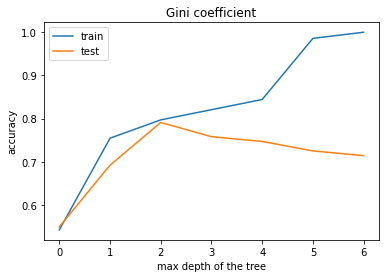

In [ ]:
#for gini method
train_acc = []
test_acc = []
for depth in range(7):
  d = DecisionTree(depth)
  tree = d.build(data_train,cal_gini)
  count = 0
  for i in range(len(data_train)):
    if d.predict(data_train[i],tree) == data_train[i][-1]:
      count += 1
  train_acc.append(count/len(data_train))
  count = 0
  for i in range(len(data_test)):
    if d.predict(data_test[i],tree) == data_test[i][-1]:
      count += 1
  test_acc.append(count/len(data_test))
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train','test'])
plt.xlabel('max depth of the tree')
plt.ylabel('accuracy')
plt.title('Gini coefficient')

Text(0.5, 1.0, 'Entropy')

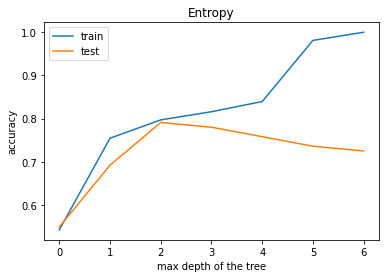

In [ ]:
#for entropy method
train_acc = []
test_acc = []
for depth in range(7):
  d = DecisionTree(depth)
  tree = d.build(data_train,cal_entropy)
  count = 0
  for i in range(len(data_train)):
    if d.predict(data_train[i],tree) == data_train[i][-1]:
      count += 1
  train_acc.append(count/len(data_train))
  count = 0
  for i in range(len(data_test)):
    if d.predict(data_test[i],tree) == data_test[i][-1]:
      count += 1
  test_acc.append(count/len(data_test))
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train','test'])
plt.xlabel('max depth of the tree')
plt.ylabel('accuracy')
plt.title('Entropy')

In [ ]:
from random import randrange
from collections import Counter
import statistics as st
#for Boostrap sampling
def subsample(data):
  sample = []
  n_sample = round(len(data))
  while len(sample) < n_sample:
    index = randrange(len(data))
    sample.append(data[index])
  return sample
BS = []
for repeat in range(11):
  pred = []
  for i in range(101):
    s = np.array(subsample(data_train))
    d = DecisionTree(3)
    tree = d.build(s,cal_entropy)
    li = []
    for i in range(len(data_test)):
      li.append(d.predict(data_test[i],tree))
    pred.append(li)
  pred = np.array(pred)
  final_pred = []
  for i in range(pred.shape[1]):
    final_pred.append(Counter(pred[:,i]).most_common(1)[0][0])
  count = 0
  for i in range(len(data_test)):
    if final_pred[i] == data_test[i][-1]:
      count += 1
  BS.append(count/len(data_test))
print(st.median(BS))
print(min(BS))
print(max(BS))

0.8461538461538461
0.8351648351648352
0.8681318681318682


In [ ]:
from random import randint
#for random forest
def randlist(n,d):
  li = []
  count = 0
  while count < d:
    index = randint(0,n)
    if index not in li:
      li.append(randint(0,n))
      count += 1
  return li
class RandomForest:
  def __init__(self,max_depth):
    self.max_depth = max_depth
    self.counts_generation = 1
  def build(self, data, scoref):
    if len(data) == 0 : return decisionnode()
    score = scoref(data)
    best_loss = float('inf')
    best_criteria = None
    best_sets = None
    column_list = randlist(len(data[0])-1,4)
    for col in column_list:
      column_values = {}
      for row in data:
        column_values[row[col]] = 1
      for value in column_values.keys():
        (set1,set2) = dividedata(data,col,value)
        prob = float(len(set1))/len(data)
        loss = prob*scoref(set1) + (1-prob)*scoref(set2)
        if loss < best_loss and len(set1) > 0 and len(set2) > 0:
          best_loss = loss
          best_criteria = (col,value)
          best_sets = (set1,set2)
    if best_loss < score and self.counts_generation < 2**(self.max_depth):
      self.counts_generation += 1
      truebranch = self.build(best_sets[0],scoref)
      falsebranch = self.build(best_sets[1],scoref)
      return decisionnode(col = best_criteria[0],value = best_criteria[1],tb = truebranch,fb = falsebranch)
    else: 
      return decisionnode(results = same_label_counts(data))
  def predict(self, data, tree):
    if tree.results!= None:
      return max(tree.results,key=lambda x : tree.results[x])
    else:
      v = data[tree.col]
      branch = None
      if v >= tree.value : branch = tree.tb
      else : branch = tree.fb
      return self.predict(data,branch)
BS = []
for repeat in range(11):
  pred = []
  for i in range(101):
    s = np.array(subsample(data_train))
    d = DecisionTree(3)
    tree = d.build(s,cal_entropy)
    li = []
    for i in range(len(data_test)):
      li.append(d.predict(data_test[i],tree))
    pred.append(li)
  pred = np.array(pred)
  final_pred = []
  for i in range(pred.shape[1]):
    final_pred.append(Counter(pred[:,i]).most_common(1)[0][0])
  count = 0
  for i in range(len(data_test)):
    if final_pred[i] == data_test[i][-1]:
      count += 1
  BS.append(count/len(data_test))
print(st.median(BS))
print(min(BS))
print(max(BS))

0.8571428571428571
0.8351648351648352
0.8681318681318682


In [15]:
########################Exercise 3###########################################
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
import matplotlib.pyplot as plt
x_train = tf.transpose(x_train,[1,2,0])
x_test = tf.transpose(x_test,[1,2,0])
x_train = tf.image.resize(x_train,[32,32])
x_test = tf.image.resize(x_test,[32,32])
x_train = tf.transpose(x_train,[2,0,1])
x_test = tf.transpose(x_test,[2,0,1])

In [17]:
from tensorflow.keras import datasets, layers, models
input_shape = [32,32,1]
model = models.Sequential()
Conv2D = layers.Conv2D
MaxPooling2D = layers.MaxPooling2D
Flatten = layers.Flatten
Dense = layers.Dense
Dropout = layers.Dropout
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 37s 20ms/step - loss: 2.2916 - accuracy: 0.1366 - val_loss: 2.2344 - val_accuracy: 0.2772
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.8421 - accuracy: 0.7145 - val_loss: 0.1849 - val_accuracy: 0.9424
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1366 - accuracy: 0.9585 - val_loss: 0.1002 - val_accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0843 - accuracy: 0.9742 - val_loss: 0.0555 - val_accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0637 - accuracy: 0.9802 - val_loss: 0.0539 - val_accuracy: 0.9816


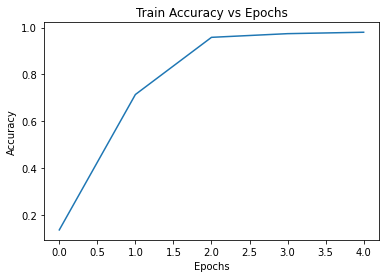

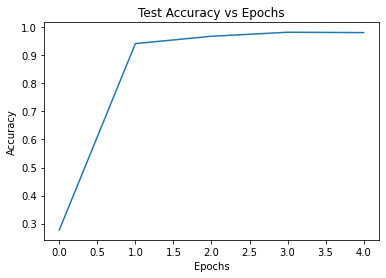

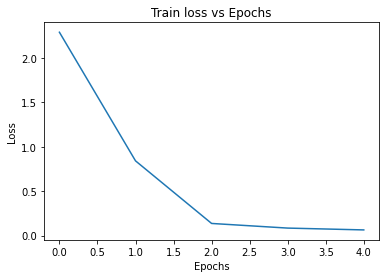

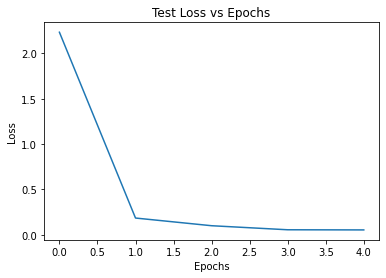

In [19]:
import matplotlib.pyplot as plt
#history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Train Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()
plt.plot(history.history['val_accuracy'])
plt.title('Test Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()
plt.plot(history.history['loss'])
plt.title('Train loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()
plt.plot(history.history['val_loss'])
plt.title('Test Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [20]:
#######c(i)
seed = (2, 3)
x_test_LR = tf.image.stateless_random_flip_left_right(tf.transpose(x_test,[1,2,0]),seed)
x_test_UD = tf.image.stateless_random_flip_up_down(tf.transpose(x_test,[1,2,0]),seed)
x_test_LR = tf.transpose(x_test_LR,[2,0,1])
x_test_UD = tf.transpose(x_test_UD,[2,0,1])
test_loss_LR,test_acc_LR = model.evaluate(x_test_LR,y_test,verbose=1)
test_loss_UD,test_acc_UD = model.evaluate(x_test_UD,y_test,verbose=1)
print(test_loss_LR)
print(test_acc_LR)
print(test_loss_UD)
print(test_acc_UD)

313/313 [==============================] - 2s 6ms/step - loss: 5.2713 - accuracy: 0.3341
4.344553470611572
0.4025000035762787
5.2713093757629395
0.33410000801086426


In [22]:
######c(ii)
shape = [x_test.shape[0],x_test.shape[1],x_test.shape[2]]
noise_001 = tf.random.normal(shape,stddev=0.1)
noise_01 = tf.random.normal(shape,stddev=0.316)
noise_1 = tf.random.normal(shape,stddev=1)
x_test_noise_001 = tf.add(x_test,noise_001)
x_test_noise_01 = tf.add(x_test,noise_01)
x_test_noise_1 = tf.add(x_test,noise_1)
test_loss_noise,test_acc_noise = model.evaluate(x_test_noise_001,y_test,verbose=1)
print(test_loss_noise)
print(test_acc_noise)
test_loss_noise,test_acc_noise = model.evaluate(x_test_noise_01,y_test,verbose=1)
print(test_loss_noise)
print(test_acc_noise)
test_loss_noise,test_acc_noise = model.evaluate(x_test_noise_1,y_test,verbose=1)
print(test_loss_noise)
print(test_acc_noise)

313/313 [==============================] - 3s 8ms/step - loss: 0.0561 - accuracy: 0.9815
0.0560816265642643
0.9815000295639038
313/313 [==============================] - 2s 8ms/step - loss: 0.1033 - accuracy: 0.9666
0.10328243672847748
0.9666000008583069
313/313 [==============================] - 2s 7ms/step - loss: 1.5865 - accuracy: 0.6009
1.5864946842193604
0.6008999943733215


In [30]:
#0.01 variance does not influence much on the test accuracy, so only need train data augmentation in flip way 
import random
new_model = models.Sequential()
new_model.add(tf.keras.layers.GaussianNoise(stddev=random.uniform(0,1),input_shape=input_shape))
new_model.add(layers.RandomFlip("horizontal_and_vertical",input_shape=input_shape))
new_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
new_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
new_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
new_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
new_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
new_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
new_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
new_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
new_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
new_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
new_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
new_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
new_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 
new_model.add(Flatten()) 
new_model.add(Dense(4096, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(4096, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(10, activation='softmax'))
new_model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [31]:
#d
new_history = new_model.fit(x_train, y_train, epochs=5)
test_loss_LR,test_acc_LR = new_model.evaluate(x_test_LR,y_test,verbose=1)
test_loss_UD,test_acc_UD = new_model.evaluate(x_test_UD,y_test,verbose=1)
print(test_loss_LR)
print(test_acc_LR)
print(test_loss_UD)
print(test_acc_UD)
test_loss_noise,test_acc_noise = new_model.evaluate(x_test_noise_001,y_test,verbose=1)
print(test_loss_noise)
print(test_acc_noise)
test_loss_noise,test_acc_noise = new_model.evaluate(x_test_noise_01,y_test,verbose=1)
print(test_loss_noise)
print(test_acc_noise)
test_loss_noise,test_acc_noise = new_model.evaluate(x_test_noise_1,y_test,verbose=1)
print(test_loss_noise)
print(test_acc_noise)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 37s 19ms/step - loss: 2.3008 - accuracy: 0.1120
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 2.2130 - accuracy: 0.1790
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 1.1777 - accuracy: 0.5662
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.6345 - accuracy: 0.7813
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.1929 - accuracy: 0.9392
0.2333139181137085
0.9262999892234802
0.19285358488559723
0.9391999840736389
313/313 [==============================] - 2s 7ms/step - loss: 0.1974 - accuracy: 0.9390
0.19735224545001984
0.9390000104904175
313/313 [==============================] - 2s 7ms/step - loss: 0.2220 - accuracy: 0.9289
0.22202730178833008
0.9289000034332275
313/313 [==============================] - 2s 7ms/step - loss: 1.1440 - accuracy: 0.6645
1.1440215110778809
0.6644999980926514
